# Data Mining Assignment 2 Part 1
# Exploratory Data Analysis
# Taiwan credit card default dataset
(Source: Taken from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)!

In [2]:
import numpy as np
import pandas as pd
import bokeh 
import os

##Read csv file into dataframe from local directory
fname1=(os.path.abspath('default of credit card clients.xls'))
df=pd.read_excel(fname1,header = 1, index_col=0, na_values=['na','-'])

df.rename(index=str, columns={"PAY_0": "Sept05 RpStatus", "PAY_2": "Aug05 RpStatus", "PAY_3": "Jul05 RpStatus",
                             "PAY_4": "Jun05 RpStatus", "PAY_5": "May05 RpStatus", "PAY_6": "Apr05 RpStatus",
                             "BILL_AMT1": "Sept05_BillAmt", "BILL_AMT2": "Aug05_BillAmt", "BILL_AMT3": "Jul05_BillAmt",
                             "BILL_AMT4": "Jun05_BillAmt", "BILL_AMT5": "May05_BillAmt", "BILL_AMT6": "Apr05_BillAmt",
                             "PAY_AMT1": "Sept05_PayAmt", "PAY_AMT2": "Aug05_PayAmt", "PAY_AMT3": "Jul05_PayAmt",
                             "PAY_AMT4": "Jun05_PayAmt", "PAY_AMT5": "May05_PayAmt", "PAY_AMT6": "Apr05_PayAmt"},
         inplace = True)

print('Dimension of data is', df.shape)
df.head(5)

Dimension of data is (30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept05 RpStatus,Aug05 RpStatus,Jul05 RpStatus,Jun05 RpStatus,May05 RpStatus,...,Jun05_BillAmt,May05_BillAmt,Apr05_BillAmt,Sept05_PayAmt,Aug05_PayAmt,Jul05_PayAmt,Jun05_PayAmt,May05_PayAmt,Apr05_PayAmt,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#Create sets of dictionaries for all categorical columns
sex_dict={1:'M', 2: 'F'}

education_dict = {0: 'Others', 1:'Grad school', 2:'University', 3:'High school', 4: 'Others', 5: 'Others', 6: 'Others'}
marriage_dict = {0:'Others', 1:'Married', 2:'Single', 3:'Divorced'}
default_dict = {0:'No', 1:'Yes'}

df1=df.replace({'SEX': sex_dict, 'EDUCATION': education_dict, 'MARRIAGE': marriage_dict,
           'default payment next month': default_dict }, inplace = False)

#View of final dataset after cleaning
df1.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept05 RpStatus,Aug05 RpStatus,Jul05 RpStatus,Jun05 RpStatus,May05 RpStatus,...,Jun05_BillAmt,May05_BillAmt,Apr05_BillAmt,Sept05_PayAmt,Aug05_PayAmt,Jul05_PayAmt,Jun05_PayAmt,May05_PayAmt,Apr05_PayAmt,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,F,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Yes
2,120000,F,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
3,90000,F,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
4,50000,F,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
5,50000,M,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


Check for null values in dataset

In [4]:
#check for null values
#get the number of missing data points per column
missing_values_count=df1.isnull().sum()
print(missing_values_count)

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
Sept05 RpStatus               0
Aug05 RpStatus                0
Jul05 RpStatus                0
Jun05 RpStatus                0
May05 RpStatus                0
Apr05 RpStatus                0
Sept05_BillAmt                0
Aug05_BillAmt                 0
Jul05_BillAmt                 0
Jun05_BillAmt                 0
May05_BillAmt                 0
Apr05_BillAmt                 0
Sept05_PayAmt                 0
Aug05_PayAmt                  0
Jul05_PayAmt                  0
Jun05_PayAmt                  0
May05_PayAmt                  0
Apr05_PayAmt                  0
default payment next month    0
dtype: int64


No missing values

# Exploratory Data Analysis

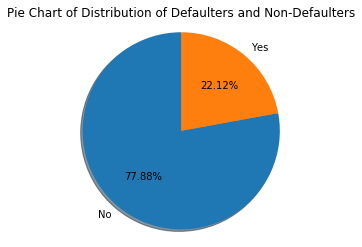

In [5]:
#Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

target_df=df1.groupby(['default payment next month']).count()

labels = 'No', 'Yes'
sizes= [target_df.values[0][1], target_df.values[1][1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Pie Chart of Distribution of Defaulters and Non-Defaulters");

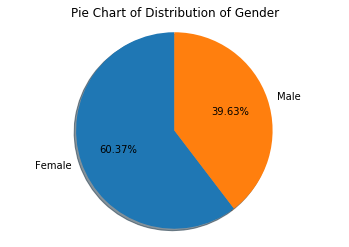

In [6]:
gender_df=df1.groupby(['SEX']).count()

labels = 'Female', 'Male'
sizes= [gender_df.values[0][1], gender_df.values[1][1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Pie Chart of Distribution of Gender");

From the 2 pie charts above, we can see that there are imbalance class distribution in this dataset. There are more non-defaulters than defaulters and there are more females in the sample than males. This create a problem because the model is just simply being fed more data on one class and thus create predictions that are skewed based on the majority class.

In [7]:
sumgender_df = df1.groupby(['SEX', 'default payment next month']).count()

In [8]:
sgdf = sumgender_df[['AGE']]

sgdf1= sgdf.unstack(level = -1)
sgdf1['total'] = sgdf1.sum(axis=1)

sgdf1['Prop_No'] = sgdf1['AGE']['No'].values/sgdf1['total']
sgdf1['Prop_Yes'] = sgdf1['AGE']['Yes'].values/sgdf1['total']
sgdf1.drop(['AGE','total'], axis=1 ,inplace =True)

sgdf1.reset_index(inplace =True)
sgdf1.set_index("SEX", inplace =True)

sgdf1.rename(columns={'Prop_No':'Non-Default','Prop_Yes':'Default'}, inplace=True)

sgdf1


,Non-Default,Default
default payment next month,,
SEX,,
F,0.792237,0.207763
M,0.758328,0.241672


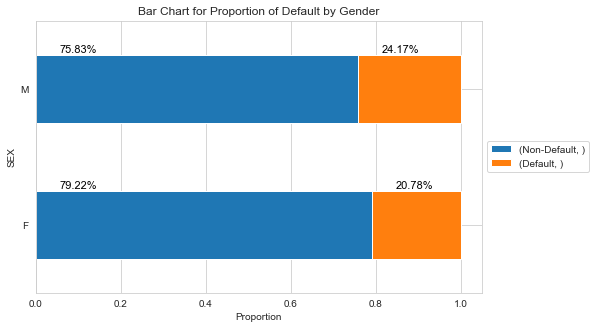

In [9]:
sns.set_style("whitegrid")
ax=sgdf1.plot.barh(stacked=True, title= "Bar Chart for Proportion of Default by Gender", figsize = (8,5))

#plot legend outside the ax
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#Set x label
plt.xlabel('Proportion')

#label the proportion
for lbl in ax.patches:
    ax.annotate("{:.2f}%".format(lbl.get_width()*100), (lbl.get_x()+0.1, lbl.get_y()+0.5), verticalalignment='bottom', horizontalalignment='center', fontsize=11, color='black')


From the bar chart, 24.17% of males default vs 20.78% of females default.

In [10]:
sumedu_df = df1.groupby(['EDUCATION','default payment next month']).count()
edudf = sumedu_df[['AGE']]
edudf1= edudf.unstack(level = -1)

edudf1['total'] = edudf1.sum(axis=1)

edudf1['Prop_No'] = edudf1['AGE']['No'].values/edudf1['total']
edudf1['Prop_Yes'] = edudf1['AGE']['Yes'].values/edudf1['total']
edudf1.drop(['AGE','total'], axis=1 ,inplace =True)

edudf1.reset_index(inplace =True)

edudf1.set_index("EDUCATION", inplace =True)

edudf1.rename(columns={'Prop_No':'Non-Default','Prop_Yes':'Default'}, inplace=True)

edudf1

,Non-Default,Default
default payment next month,,
EDUCATION,,
Grad school,0.807652,0.192348
High school,0.748424,0.251576
Others,0.929487,0.070513
University,0.762651,0.237349


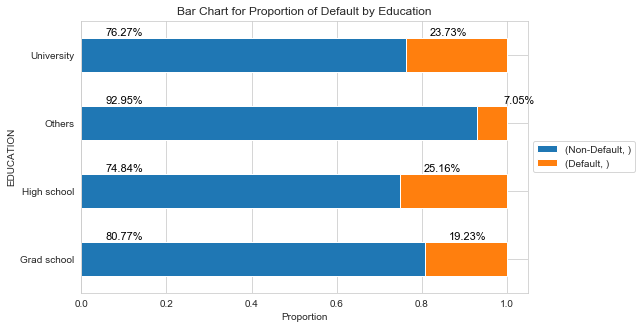

In [11]:
ax=edudf1.plot.barh(stacked=True, title= "Bar Chart for Proportion of Default by Education", figsize = (8,5))
#plot legend outside ax
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#Set x label
plt.xlabel('Proportion')

#label the proportion
for lbl in ax.patches:
    ax.annotate("{:.2f}%".format(lbl.get_width()*100), (lbl.get_x()+0.1, lbl.get_y()+0.5), verticalalignment='bottom', horizontalalignment='center', fontsize=11, color='black')


25.16% of High school graduates, 23.73% university graduates and 19.23% grad school graduates default. Only 7.05% of credit card users of "others" Education defaulted.

In [12]:
summs_df = df1.groupby(['MARRIAGE', 'default payment next month']).count()

mstat_df = summs_df[['AGE']]
mstat_df= mstat_df.unstack(level = -1)
mstat_df['total'] = mstat_df.sum(axis=1)

mstat_df['Prop_No'] = mstat_df['AGE']['No'].values/mstat_df['total']
mstat_df['Prop_Yes'] = mstat_df['AGE']['Yes'].values/mstat_df['total']
mstat_df.drop(['AGE','total'], axis=1 ,inplace =True)

mstat_df.reset_index(inplace =True)

mstat_df.set_index('MARRIAGE', inplace =True)

mstat_df.rename(columns={'Prop_No':'Non-Default','Prop_Yes':'Default'}, inplace=True)

mstat_df

,Non-Default,Default
default payment next month,,
MARRIAGE,,
Divorced,0.739938,0.260062
Married,0.765283,0.234717
Others,0.907407,0.092593
Single,0.790717,0.209283


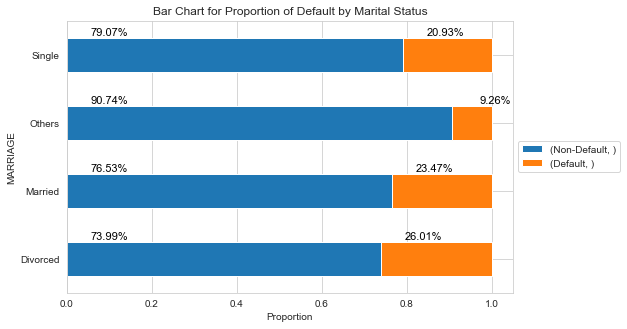

In [13]:
ax=mstat_df.plot.barh(stacked=True, title= "Bar Chart for Proportion of Default by Marital Status", figsize = (8,5))
#plot legend outside ax
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#Set x label
plt.xlabel('Proportion')

#label the proportion
for lbl in ax.patches:
    ax.annotate("{:.2f}%".format(lbl.get_width()*100), (lbl.get_x()+0.1, lbl.get_y()+0.5), verticalalignment='bottom', horizontalalignment='center', fontsize=11, color='black')


From the chart, 26.01% divorcees defaulted. 23.47% married individuals defaulted while 20.93% singles defaulted. 9.26% of 'others' marital status category defaulted.

In [14]:
limitdf = df1[['default payment next month', 'LIMIT_BAL']]

is_default =  limitdf['default payment next month']=='Yes'
limitdefault = limitdf[is_default]

no_default =  limitdf['default payment next month']=='No'
limitnodefault = limitdf[no_default]
#limitdefault.head(5)

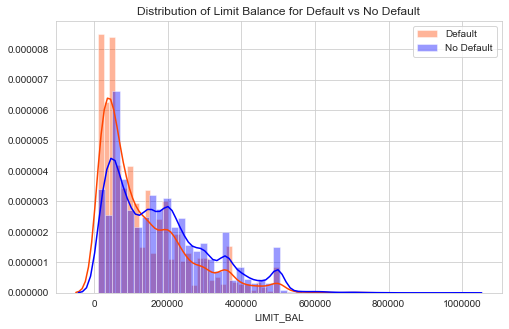

In [15]:
fig, ax = plt.subplots(figsize=(8,5))

ax.set_title('Distribution of Limit Balance for Default vs No Default')
sns.distplot(limitdefault["LIMIT_BAL"] , color="orangered", label="Default")
sns.distplot(limitnodefault["LIMIT_BAL"] , color="blue", label="No Default")
plt.legend();

Higher proportion of defaulters have lower limit balance

In [16]:
agedf1 = df1[['default payment next month', 'AGE']]
is_default =  agedf1['default payment next month']=='Yes'
agedf2 = agedf1[is_default]

no_default =  agedf1['default payment next month']=='No'
agedf3 = agedf1[no_default]

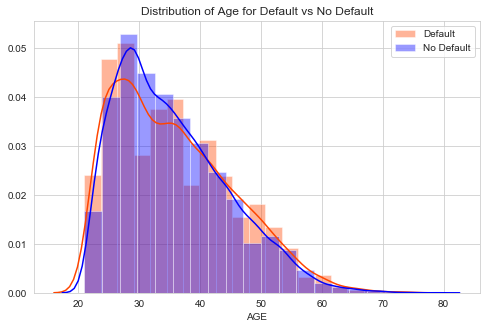

In [17]:
fig, ax = plt.subplots(figsize=(8,5))

ax.set_title('Distribution of Age for Default vs No Default')

sns.distplot(agedf2["AGE"] , color="orangered", label="Default", bins=20)
sns.distplot(agedf3["AGE"] , color="blue", label="No Default", bins=20)
plt.legend();

In [18]:
Paydelaydf = df1[['default payment next month', 'Sept05 RpStatus', 'Aug05 RpStatus', 'Jul05 RpStatus', 'Jun05 RpStatus', 'May05 RpStatus', 'Apr05 RpStatus']]

is_default =  Paydelaydf['default payment next month']=='Yes'
delaydefault = Paydelaydf[is_default]

no_default =  Paydelaydf['default payment next month']=='No'
delaynodefault = Paydelaydf[no_default]


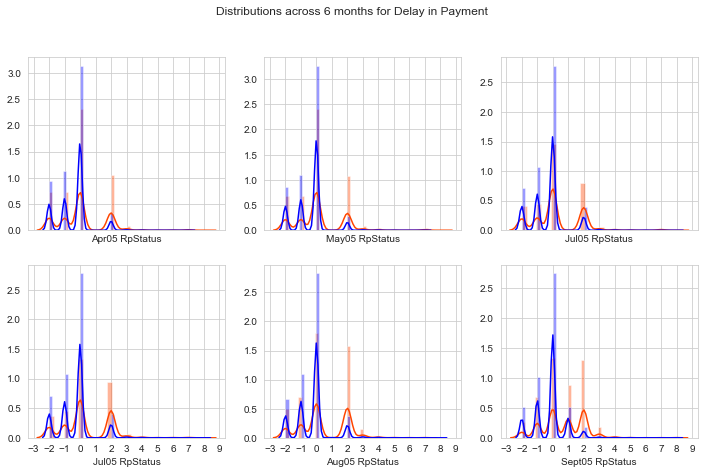

In [19]:
fig, (ax1, ax2) = plt.subplots(2,3, figsize=(12, 7), sharex=True)
fig.suptitle("Distributions across 6 months for Delay in Payment")

p1a= sns.distplot( delaydefault["Apr05 RpStatus"] , color="orangered", ax=ax1[0])
p1b= sns.distplot( delaynodefault["Apr05 RpStatus"] , color="blue", ax=ax1[0])
p2a= sns.distplot( delaydefault["May05 RpStatus"] , color="orangered", ax=ax1[1])
p2b= sns.distplot( delaynodefault["May05 RpStatus"] , color="blue", ax=ax1[1])
p3a= sns.distplot( delaydefault["Jun05 RpStatus"] , color="orangered", ax=ax1[2])
p3b= sns.distplot( delaynodefault["Jul05 RpStatus"] , color="blue", ax=ax1[2])
p4a= sns.distplot( delaydefault["Jul05 RpStatus"] , color="orangered", ax=ax2[0])
p4b= sns.distplot( delaynodefault["Jul05 RpStatus"] , color="blue", ax=ax2[0])
p5a= sns.distplot( delaydefault["Aug05 RpStatus"] , color="orangered", ax=ax2[1])
p5b= sns.distplot( delaynodefault["Aug05 RpStatus"] , color="blue", ax=ax2[1])
p6a= sns.distplot( delaydefault["Sept05 RpStatus"] , color="orangered", ax=ax2[2])
p6b= sns.distplot( delaynodefault["Sept05 RpStatus"] , color="blue", ax=ax2[2])

p1a.xaxis.set_major_locator(ticker.MultipleLocator(1))


As we can see from the plots above, proportion of defaulters is higher for delayed payments > 0 month.

In [20]:
Payamtdf1 = df1[['Apr05_PayAmt', 'May05_PayAmt', 'Jun05_PayAmt', 'Jul05_PayAmt', 'Aug05_PayAmt', 'Sept05_PayAmt', 'default payment next month']]

is_default =  Payamtdf1['default payment next month']=='Yes'
Paydefault = Payamtdf1[is_default]

no_default =  Payamtdf1['default payment next month']=='No'
Paynodefault = Payamtdf1[no_default]


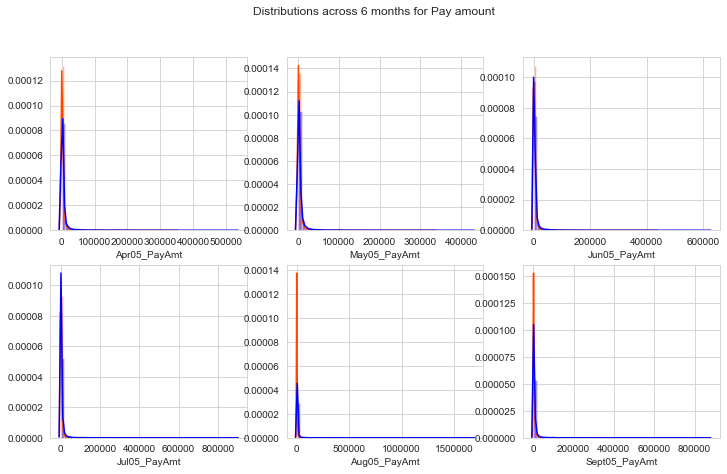

In [21]:
fig, (ax1, ax2) = plt.subplots(2,3, figsize=(12, 7), sharex=False)
fig.suptitle("Distributions across 6 months for Pay amount")

sns.distplot( Paydefault["Apr05_PayAmt"] , color="orangered", ax=ax1[0])
sns.distplot( Paynodefault["Apr05_PayAmt"] , color="blue", ax=ax1[0])
sns.distplot( Paydefault["May05_PayAmt"] , color="orangered", ax=ax1[1])
sns.distplot( Paynodefault["May05_PayAmt"] , color="blue", ax=ax1[1])
sns.distplot( Paydefault["Jun05_PayAmt"] , color="orangered", ax=ax1[2])
sns.distplot( Paynodefault["Jun05_PayAmt"] , color="blue", ax=ax1[2])
sns.distplot( Paydefault["Jul05_PayAmt"] , color="orangered", ax=ax2[0])
sns.distplot( Paynodefault["Jul05_PayAmt"] , color="blue", ax=ax2[0])
sns.distplot( Paydefault["Aug05_PayAmt"] , color="orangered", ax=ax2[1])
sns.distplot( Paynodefault["Aug05_PayAmt"] , color="blue", ax=ax2[1])
sns.distplot( Paydefault["Sept05_PayAmt"] , color="orangered", ax=ax2[2])
sns.distplot( Paynodefault["Sept05_PayAmt"] , color="blue", ax=ax2[2])


From the above plots, it is not very clear but a higher proportion of defaulters pay less (almost 0) monthly.

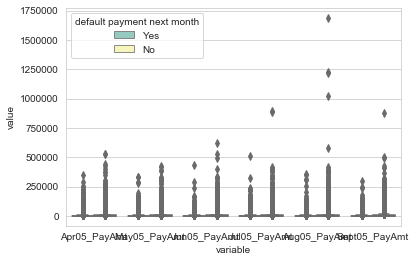

In [22]:
Payamtdf2= Payamtdf1.melt(id_vars=['default payment next month'])
ax = sns.boxplot(x="variable", y="value", hue="default payment next month", data=Payamtdf2, palette="Set3")

From the Payment Amount features, we observe that there are many outliers in this feature.

In [23]:
Billdf1 = df1[['Apr05_BillAmt', 'May05_BillAmt', 'Jun05_BillAmt', 'Jul05_BillAmt', 'Aug05_BillAmt', 'Sept05_BillAmt', 'default payment next month']]

is_default =  Billdf1['default payment next month']=='Yes'
Billdefault = Billdf1[is_default]

no_default =  Billdf1['default payment next month']=='No'
Billnodefault = Billdf1[no_default]

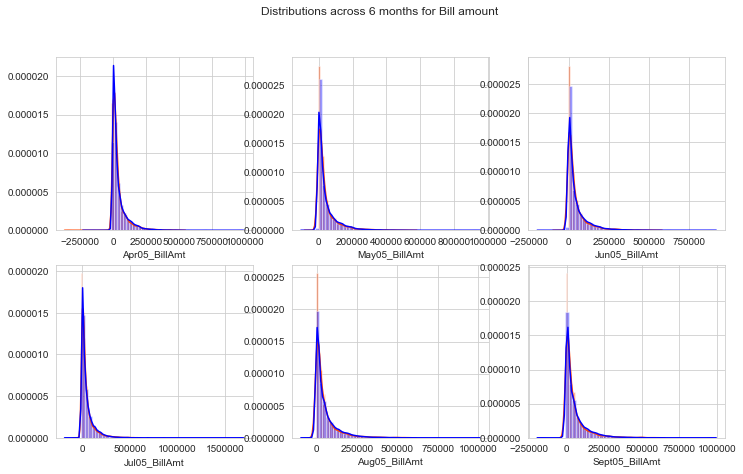

In [24]:
fig, (ax1, ax2) = plt.subplots(2,3, figsize=(12, 7), sharex=False)
fig.suptitle("Distributions across 6 months for Bill amount")

sns.distplot( Billdefault["Apr05_BillAmt"] , color="orangered", ax=ax1[0])
sns.distplot( Billnodefault["Apr05_BillAmt"] , color="blue", ax=ax1[0])
sns.distplot( Billdefault["May05_BillAmt"] , color="orangered", ax=ax1[1])
sns.distplot( Billnodefault["May05_BillAmt"] , color="blue", ax=ax1[1])
sns.distplot( Billdefault["Jun05_BillAmt"] , color="orangered", ax=ax1[2])
sns.distplot( Billnodefault["Jun05_BillAmt"] , color="blue", ax=ax1[2])
sns.distplot( Billdefault["Jul05_BillAmt"] , color="orangered", ax=ax2[0])
sns.distplot( Billnodefault["Jul05_BillAmt"] , color="blue", ax=ax2[0])
sns.distplot( Billdefault["Aug05_BillAmt"] , color="orangered", ax=ax2[1])
sns.distplot( Billnodefault["Aug05_BillAmt"] , color="blue", ax=ax2[1])
sns.distplot( Billdefault["Sept05_BillAmt"] , color="orangered", ax=ax2[2])
sns.distplot( Billnodefault["Sept05_BillAmt"] , color="blue", ax=ax2[2]);

Proportion of defaulters are higher at lower bill amount for Aug05 and Sept05. The difference between bill amount for defaulters vs non-defaulters did not show any significant difference.

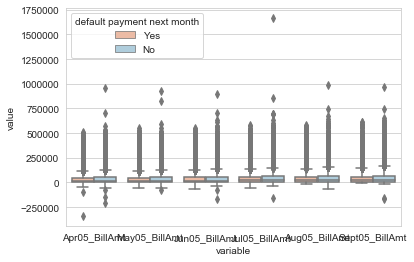

In [25]:
Billdf2= Billdf1.melt(id_vars=['default payment next month'])
ax = sns.boxplot(x="variable", y="value", hue="default payment next month", data=Billdf2, palette="RdBu")

There are also many outliers in Bill Amount for all month. Thus, I have chosen not to remove any outliers for analysis as it could lead to a loss in information.

# Feature Engineering
From the observations above, there doesn't seem to be any clear indication of defaulters vs non-defaulters for Bill Amount (other than higher proportions for lower bill amount in Sept & Aug 05), and Payment Amount (other than higher proportions for lower payment amount). Let's derive more features base on observations of the dataset.

One of the things that can be done is to combine the 6 month Payment status into 1 feature as Payment delay score, averaging all the payment delay as a single number.

# 1. Averaging delays into a single feature column

In [26]:
df1['avrg_delay'] = df1.iloc[:,5:11].mean(axis=1)

As expected, this feature should be highly correlated to the rest of the monthly repayment status columns.
So we should see a difference in proportion of defaulters vs non defaulters as the average delay goes up.

In [27]:
Delaydf = df1[['default payment next month', 'avrg_delay']]

is_default =  Delaydf['default payment next month']=='Yes'
delaydefault = Delaydf[is_default]

no_default =  Delaydf['default payment next month']=='No'
delaynodefault = Delaydf[no_default]


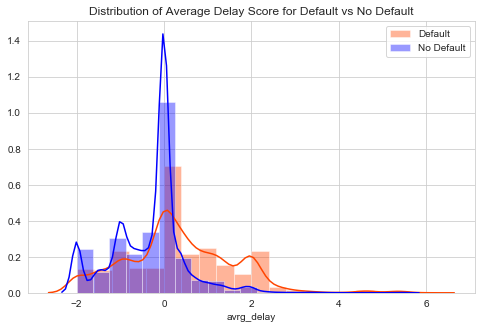

In [28]:
fig, ax = plt.subplots(figsize=(8,5))

ax.set_title('Distribution of Average Delay Score for Default vs No Default')

sns.distplot(delaydefault['avrg_delay'] , color="orangered", label="Default", bins=20)
sns.distplot(delaynodefault['avrg_delay'] , color="blue", label="No Default", bins=20)
plt.legend();

From the plot we can see a difference in proportion for default vs no default for average delay > 0 months

# 2. Create a new feature from the number of missed payments. 

In [29]:
df1['Missed_payments'] = (df1.iloc[:,-8:-2]==0).sum(axis=1)

In [30]:
Mspaymentdf = df1[['default payment next month', 'Missed_payments']]

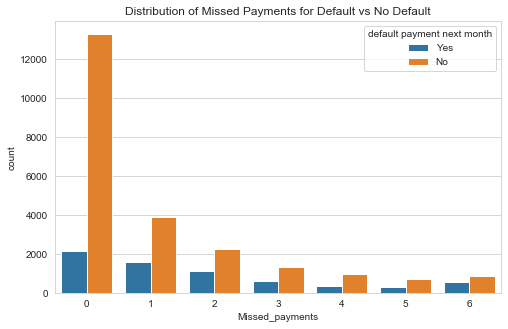

In [31]:
fig, ax = plt.subplots(figsize=(8,5))

ax.set_title('Distribution of Missed Payments for Default vs No Default')
ax = sns.countplot(x="Missed_payments", hue="default payment next month", data=Mspaymentdf)

From this chart, it seems that the proportion of defaulters increase with more missed payments.

# 3. August 05 expenditure predictive of default?
September Bill Amount - (August Bill Amount - Sept Pay Amount (to pay off august bill))

In [32]:
df1['Aug_expenditure'] = df1['Sept05_BillAmt'] - (df1['Aug05_BillAmt'] - df1['Sept05_PayAmt']) 

In [33]:
Expdf = df1[['default payment next month', 'Aug_expenditure']]

is_default =  Expdf['default payment next month']=='Yes'
Expdefault = Expdf[is_default]

no_default =  Expdf['default payment next month']=='No'
Expnodefault = Expdf[no_default]


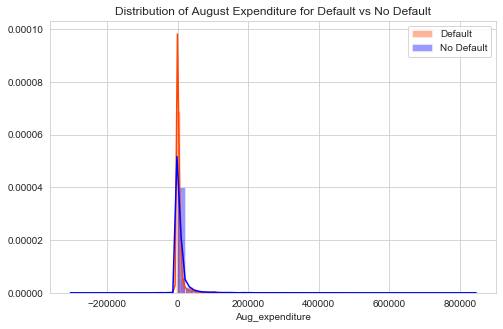

In [34]:
fig, ax = plt.subplots(figsize=(8,5))

ax.set_title('Distribution of August Expenditure for Default vs No Default')

sns.distplot(Expdefault['Aug_expenditure'], color="orangered", label="Default")
sns.distplot(Expnodefault['Aug_expenditure'] , color="blue", label="No Default")
plt.legend();

Proportion of default is higher for low August expenditure. 

# 4. Credit Utilization Ratio = amount owed / Credit Limit

In [35]:
df1['CURatio']=df1['Sept05_BillAmt']/df1['LIMIT_BAL']

In [36]:
CURatiodf = df1[['default payment next month', 'CURatio']]

is_default = CURatiodf['default payment next month']=='Yes'
CUdefault = CURatiodf[is_default]

no_default =  CURatiodf['default payment next month']=='No'
CUnodefault = CURatiodf[no_default]


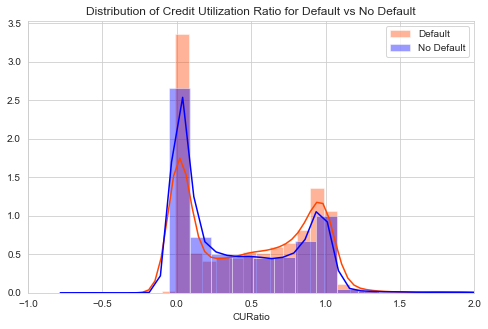

In [37]:
fig, ax = plt.subplots(figsize=(8,5))

ax.set_title('Distribution of Credit Utilization Ratio for Default vs No Default')

sns.distplot(CUdefault['CURatio'], color="orangered", label="Default")
sns.distplot(CUnodefault['CURatio'] , color="blue", label="No Default")
ax.set_xlim(-1,2)
plt.legend();

Defaulters have higher credit utilization ratio. 

# 5. August Payment Ratio: how much of the bill have the individual paid off

In [38]:
df1['Aug_Pay_Ratio'] = (df1['Sept05_PayAmt']/df1['Aug05_BillAmt']).fillna(1)
df1['Aug_Pay_Ratio'].replace([np.inf, -np.inf], 1, inplace =True)

In [39]:
APRatiodf = df1[['default payment next month', 'Aug_Pay_Ratio']]

is_default = APRatiodf['default payment next month']=='Yes'
APdefault = APRatiodf[is_default]

no_default =  APRatiodf['default payment next month']=='No'
APnodefault = APRatiodf[no_default]

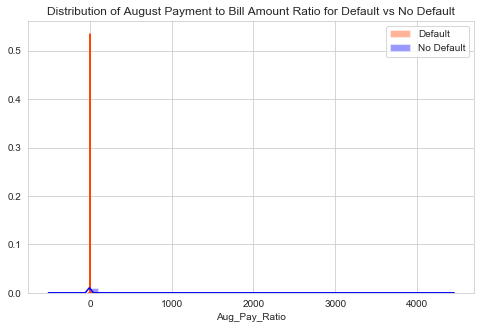

In [40]:
fig, ax = plt.subplots(figsize=(8,5))

ax.set_title('Distribution of August Payment to Bill Amount Ratio for Default vs No Default')

sns.distplot(APdefault['Aug_Pay_Ratio'], color="orangered", label="Default")
sns.distplot(APnodefault['Aug_Pay_Ratio'] , color="blue", label="No Default")

plt.legend();

A very high proportion of defaulters have almost 0 August Payment to Bill Amount Ratio

# Perform data cleaning before feature selection and model fitting

In [41]:
default_dict = {'No':0, 'Yes':1}

df2=df1.replace({'default payment next month': default_dict }, inplace = False)
df2.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept05 RpStatus,Aug05 RpStatus,Jul05 RpStatus,Jun05 RpStatus,May05 RpStatus,...,Jul05_PayAmt,Jun05_PayAmt,May05_PayAmt,Apr05_PayAmt,default payment next month,avrg_delay,Missed_payments,Aug_expenditure,CURatio,Aug_Pay_Ratio
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,F,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,1,-0.333333,5,811,0.195650,0.000000
2,120000,F,University,Single,26,-1,2,0,0,0,...,1000,1000,0,2000,1,0.500000,2,957,0.022350,0.000000
3,90000,F,University,Single,34,0,0,0,0,0,...,1000,1000,1000,5000,0,0.000000,0,16730,0.324878,0.108220
4,50000,F,University,Married,37,0,0,0,0,0,...,1200,1100,1069,1000,0,0.000000,0,757,0.939800,0.041465
5,50000,M,University,Married,57,-1,0,-1,0,0,...,10000,9000,689,679,0,-0.333333,0,4947,0.172340,0.352734


Re-order the columns

In [42]:
new_order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,23]
df3=df2[df2.columns[new_order]]

df3.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept05 RpStatus,Aug05 RpStatus,Jul05 RpStatus,Jun05 RpStatus,May05 RpStatus,...,Jul05_PayAmt,Jun05_PayAmt,May05_PayAmt,Apr05_PayAmt,avrg_delay,Missed_payments,Aug_expenditure,CURatio,Aug_Pay_Ratio,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,F,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,-0.333333,5,811,0.195650,0.000000,1
2,120000,F,University,Single,26,-1,2,0,0,0,...,1000,1000,0,2000,0.500000,2,957,0.022350,0.000000,1
3,90000,F,University,Single,34,0,0,0,0,0,...,1000,1000,1000,5000,0.000000,0,16730,0.324878,0.108220,0
4,50000,F,University,Married,37,0,0,0,0,0,...,1200,1100,1069,1000,0.000000,0,757,0.939800,0.041465,0
5,50000,M,University,Married,57,-1,0,-1,0,0,...,10000,9000,689,679,-0.333333,0,4947,0.172340,0.352734,0


# Perform one hot encoding on categorical features

In [43]:
df4= pd.get_dummies(df3, columns = ['SEX', 'EDUCATION', 'MARRIAGE'])

Reorder the columns

In [44]:
new_order = [0,1,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,2,3,4,5,6,7,21,26,27,28,29,30,31,32,33,34,35,25]

new_column_arrange=df4.columns[new_order].tolist() #put the column names into a list in the order above

df5 = df4.loc[:,(new_column_arrange[:])]
df5.head(5)

,LIMIT_BAL,AGE,Sept05_BillAmt,Aug05_BillAmt,Jul05_BillAmt,Jun05_BillAmt,May05_BillAmt,Apr05_BillAmt,Sept05_PayAmt,Aug05_PayAmt,...,SEX_M,EDUCATION_Grad school,EDUCATION_High school,EDUCATION_Others,EDUCATION_University,MARRIAGE_Divorced,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,1,0,1,0,0,1
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,0,1,0,0,0,1,1
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,1,0,0,0,1,0
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,1,0,1,0,0,0
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,1,0,0,0,1,0,1,0,0,0


# Run correlation to check for multicolinearity 

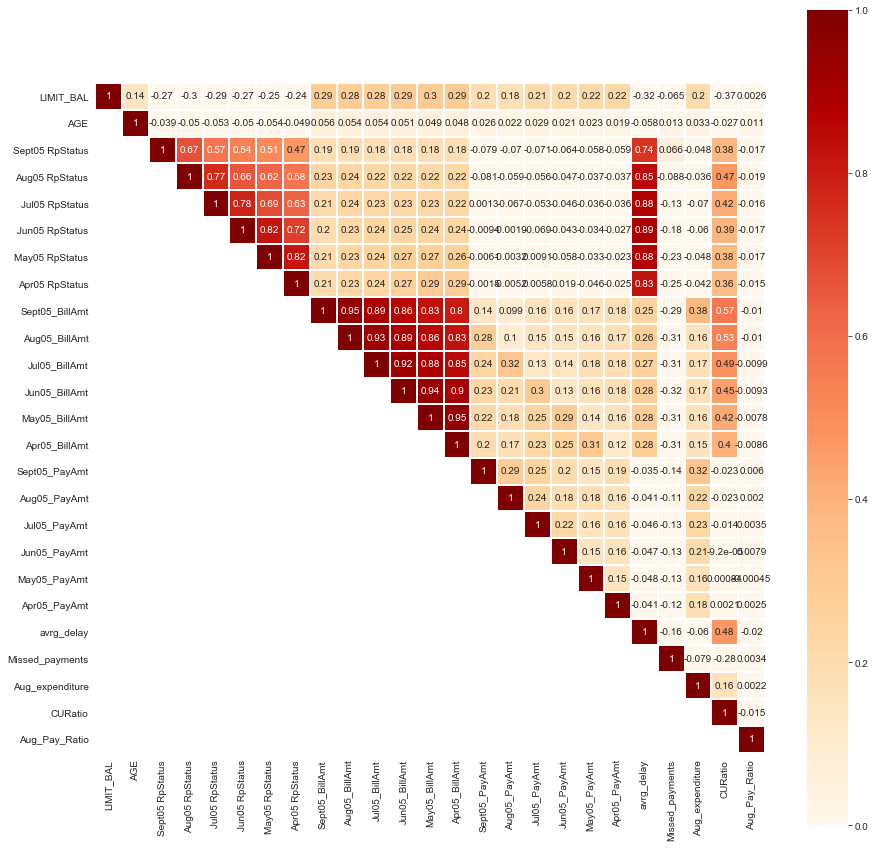

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['SEX','EDUCATION', 'MARRIAGE', 'default payment next month']
df_num_features = df2.drop(categorical_columns, axis=1)


cm=df_num_features.corr()

#Generate a mask for the upper triangle

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask=~mask

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cm, annot=True, mask=mask, vmin=0, vmax=1, cmap="OrRd", linewidths=1, square=True)

1. Repayment status of each month are quite highly correlated with repayment status of adjacent month.
2. Bill amount of each month are highly correlated with each other
3. As expected average delay is quite highly correlated with Repayment status because its the average of all repayment status
4. Credit Utility Ratio is moderately correlated with Bill amout

# Data cleaning - removing highly correlated features

Now, we need to drop strongly correlated features from the dataset. Features that have correlation > 0.6 is considered strongly correlated.
1. Drop Apr05 - Sept05 Payment status from the dataset in favor of avrg_delay which is strongly correlated to these features
2. Drop Apr05 - Aug05 Bill Amount from the dataset and keep Sept05 Bill Amount because all these features are strongly correlated to Sept05 Bill Amount.
3. Drop a one-hot encoded column for each categorical feature

In [46]:
df5.drop(['Sept05 RpStatus', 'Aug05 RpStatus', 'Jul05 RpStatus', 'Jun05 RpStatus', 'May05 RpStatus', 'Apr05 RpStatus', 'Aug05_BillAmt', 'Jul05_BillAmt', 'Jun05_BillAmt', 'May05_BillAmt', 'Apr05_BillAmt', 'SEX_F', 'EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)
df5.head(5)

,LIMIT_BAL,AGE,Sept05_BillAmt,Sept05_PayAmt,Aug05_PayAmt,Jul05_PayAmt,Jun05_PayAmt,May05_PayAmt,Apr05_PayAmt,avrg_delay,...,Aug_Pay_Ratio,Missed_payments,SEX_M,EDUCATION_Grad school,EDUCATION_High school,EDUCATION_University,MARRIAGE_Divorced,MARRIAGE_Married,MARRIAGE_Single,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3913,0,689,0,0,0,0,-0.333333,...,0.000000,5,0,0,0,1,0,1,0,1
2,120000,26,2682,0,1000,1000,1000,0,2000,0.500000,...,0.000000,2,0,0,0,1,0,0,1,1
3,90000,34,29239,1518,1500,1000,1000,1000,5000,0.000000,...,0.108220,0,0,0,0,1,0,0,1,0
4,50000,37,46990,2000,2019,1200,1100,1069,1000,0.000000,...,0.041465,0,0,0,0,1,0,1,0,0
5,50000,57,8617,2000,36681,10000,9000,689,679,-0.333333,...,0.352734,0,1,0,0,1,0,1,0,0


Export dataframe to new excel file for Part 2 of this Assignment

In [47]:
df5.to_excel("Default_new_data.xls")